In [79]:
# Importing the required libraries
!pip install seaborn
!pip install imbalanced-learn
!pip install delayed

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import webbrowser
import os
import imblearn
import joblib

from sklearn.model_selection import train_test_split
from sklearn import ensemble
from imblearn.over_sampling import SMOTE

from pandas.plotting import scatter_matrix
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score
from sklearn.model_selection import GridSearchCV


pd.options.display.max_rows = 150
pd.options.display.max_columns = 150

In [3]:
# Read the dataset into a data table using Pandas
data = pd.read_csv("data//loan_data.csv")
data.head()


,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,REGION_RATING_CLIENT
0,1,Cash loans,M,202500.0,406597.5,Working,Secondary / secondary special,Single / not married,House / apartment,-9461,-637,-3648.0,2
1,0,Cash loans,F,270000.0,1293502.5,State servant,Higher education,Married,House / apartment,-16765,-1188,-1186.0,1
2,0,Revolving loans,M,67500.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-19046,-225,-4260.0,2
3,0,Cash loans,F,135000.0,312682.5,Working,Secondary / secondary special,Civil marriage,House / apartment,-19005,-3039,-9833.0,2
4,0,Cash loans,M,121500.0,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-19932,-3038,-4311.0,2


In [86]:
data.shape

(307511, 13)

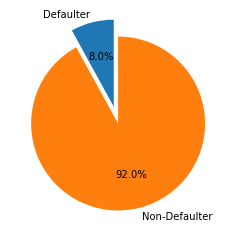

In [11]:
#Checking for data imbalance for the Target Column

Defaulter = round((data['TARGET'].value_counts()[1]/len(data)),2)
Non_Defaulter = round((data['TARGET'].value_counts()[0]/len(data)),2)
explode= (0.1,0.1)
client = [Defaulter, Non_Defaulter]
labels = 'Defaulter', 'Non-Defaulter'
plt.pie(client, labels=labels, explode=explode, autopct='%1.1f%%', startangle=90)

plt.show()

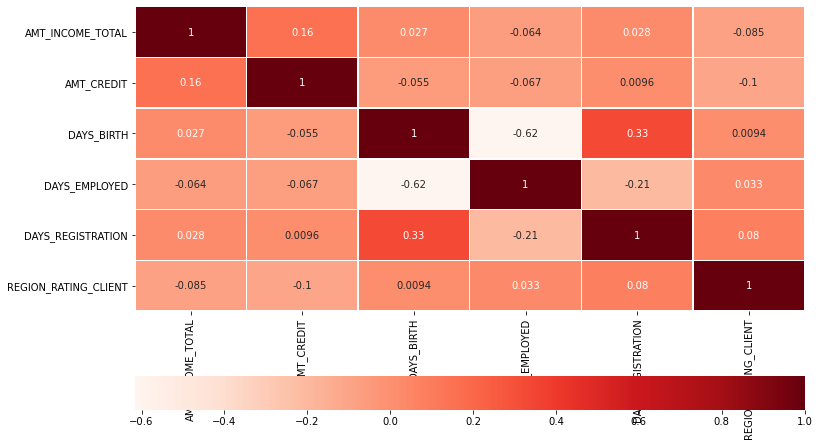

Top Ten Correlations are:
1. DAYS_BIRTH and DAYS_EMPLOYED
2. DAYS_BIRTH and DAYS_REGISTRATION
3. DAYS_EMPLOYED and DAYS_REGISTRATION
4. AMT_INCOME_TOTAL and AMT_CREDIT
5. AMT_CREDIT and REGION_RATING_CLIENT
6. AMT_INCOME_TOTAL and REGION_RATING_CLIENT
7. DAYS_REGISTRATION and REGION_RATING_CLIENT
8. AMT_CREDIT and DAYS_EMPLOYED
9. AMT_INCOME_TOTAL and DAYS_EMPLOYED
10. AMT_CREDIT and DAYS_BIRTH


In [81]:
def correlation_heatmap(var):
    plt.figure(figsize=(12,8))
    cor = var.corr()

    sns.heatmap(cor,annot=True,linewidths=.5,cbar_kws={"orientation": "horizontal"},cmap="Reds")
    plt.show()
    #Steps to obtain the top correlation.
    indices = np.where(cor > -1)
    indices = [(cor.index[x], cor.columns[y],abs(cor.iloc[x,y])) for x, y in zip(*indices) if x != y and x < y]
    a=sorted(indices, key=lambda x: x[2],reverse=True)
    print("Top Ten Correlations are:")
    for i in range(0,10):
        print('%d. '%(i+1)+a[i][0]+' and '+a[i][1])
        
correlation_heatmap(data[['AMT_INCOME_TOTAL','AMT_CREDIT','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','REGION_RATING_CLIENT']])


In [4]:
#replace categorical data with one-hot encoded data
features_data=pd.get_dummies(data,
columns=['NAME_CONTRACT_TYPE','NAME_INCOME_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','CODE_GENDER','NAME_EDUCATION_TYPE'])
features_data.columns

#Create the X and Y arrays
array = features_data.values
X = array[:,1:]  # All rows and column 1 to last column
Y = array[:,0]    # All rows and column 0 only (Target)


In [84]:
features_data.columns

Index(['TARGET', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'REGION_RATING_CLIENT',
       'NAME_CONTRACT_TYPE_Cash loans', 'NAME_CONTRACT_TYPE_Revolving loans',
       'NAME_INCOME_TYPE_Businessman', 'NAME_INCOME_TYPE_Commercial associate',
       'NAME_INCOME_TYPE_Maternity leave', 'NAME_INCOME_TYPE_Pensioner',
       'NAME_INCOME_TYPE_State servant', 'NAME_INCOME_TYPE_Student',
       'NAME_INCOME_TYPE_Unemployed', 'NAME_INCOME_TYPE_Working',
       'NAME_FAMILY_STATUS_Civil marriage', 'NAME_FAMILY_STATUS_Married',
       'NAME_FAMILY_STATUS_Separated',
       'NAME_FAMILY_STATUS_Single / not married', 'NAME_FAMILY_STATUS_Unknown',
       'NAME_FAMILY_STATUS_Widow', 'NAME_HOUSING_TYPE_Co-op apartment',
       'NAME_HOUSING_TYPE_House / apartment',
       'NAME_HOUSING_TYPE_Municipal apartment',
       'NAME_HOUSING_TYPE_Office apartment',
       'NAME_HOUSING_TYPE_Rented apartment', 'NAME_HOUSING_TYPE_With parents',
       'CODE_GEND

In [85]:
features_data.shape

(307511, 37)

In [5]:
# transform the dataset using SMOTE
oversample = SMOTE()
X,Y = oversample.fit_resample(X,Y)


In [6]:
# shuffle and split the data into 70% for training and 30% for testing
validation_size = 0.30 
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)


In [19]:
# Using a sample of the training data to test algorithms
X_train_sample = X_train[:1000]
Y_train_sample = Y_train[:1000]

In [20]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'


In [21]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=200)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('KNN', KNeighborsClassifier()))

# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
    cv_results = model_selection.cross_val_score(model, X_train_sample, Y_train_sample, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    

LR: 0.520000 (0.052915)
LDA: 0.586000 (0.052383)
CART: 0.821000 (0.033897)
NB: 0.564000 (0.032924)
SVM: 0.474000 (0.041280)
KNN: 0.518000 (0.058275)


In [38]:
# Make predictions on validation dataset
cart = DecisionTreeClassifier()
cart.fit(X_train,Y_train)
predictions = cart.predict(X_validation)
print("Accuracy:")
print(accuracy_score(Y_validation, predictions))
print()
print("Confusion matrix:")
print(confusion_matrix(Y_validation, predictions))
print()
print("Classification report:")
print(classification_report(Y_validation, predictions))


Accuracy:
0.905672947668797

Confusion matrix:
[[75934  8763]
 [ 7236 77679]]

Classification report:
              precision    recall  f1-score   support

         0.0       0.91      0.90      0.90     84697
         1.0       0.90      0.91      0.91     84915

    accuracy                           0.91    169612
   macro avg       0.91      0.91      0.91    169612
weighted avg       0.91      0.91      0.91    169612



In [63]:
rf = RandomForestClassifier(n_estimators = 500, random_state = 7)
rf.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=500, random_state=7)

In [64]:
predictions = rf.predict(X_validation)
print("Accuracy:")
print(accuracy_score(Y_validation, predictions))
print()
print("Confusion_matrix:")
print(confusion_matrix(Y_validation, predictions))
print()
print("Classification report:")
print(classification_report(Y_validation, predictions))

Accuracy:
0.948653397165295

Confusion_matrix:
[[84487   210]
 [ 8499 76416]]

Classification report:
              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95     84697
         1.0       1.00      0.90      0.95     84915

    accuracy                           0.95    169612
   macro avg       0.95      0.95      0.95    169612
weighted avg       0.95      0.95      0.95    169612



In [71]:
model = ensemble.GradientBoostingClassifier()

param_grid = {
    'n_estimators': [500, 1000, 3000],
    'max_depth': [4, 6],
    'min_samples_leaf': [3, 5, 9, 17],
    'learning_rate': [0.1, 0.05, 0.02, 0.01],
    'max_features': [1.0, 0.3, 0.1]
}

gs_cv = GridSearchCV(model, param_grid, n_jobs=4, verbose=40)

gs_cv.fit(X_train_sample,Y_train_sample)

print(gs_cv.best_params_)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
{'learning_rate': 0.02, 'max_depth': 4, 'max_features': 0.3, 'min_samples_leaf': 17, 'n_estimators': 500}


In [72]:
# Exploring gradient boost predictions
model = ensemble.GradientBoostingClassifier(
    n_estimators=500,
    learning_rate=0.02,
    max_depth=4,
    min_samples_leaf=17,
    max_features=0.3,
    loss='deviance',
    random_state=7
)
model.fit(X_train, Y_train)

GradientBoostingClassifier(learning_rate=0.02, max_depth=4, max_features=0.3,
                           min_samples_leaf=17, n_estimators=500,
                           random_state=7)

In [73]:
predictions = model.predict(X_validation)
print("Accuracy:")
print(accuracy_score(Y_validation, predictions))
print()
print("Confusion_matrix:")
print(confusion_matrix(Y_validation, predictions))
print()
print("Classification report:")
print(classification_report(Y_validation, predictions))

Accuracy:
0.9325755253166049

Confusion_matrix:
[[84697     0]
 [11436 73479]]

Classification report:
              precision    recall  f1-score   support

         0.0       0.88      1.00      0.94     84697
         1.0       1.00      0.87      0.93     84915

    accuracy                           0.93    169612
   macro avg       0.94      0.93      0.93    169612
weighted avg       0.94      0.93      0.93    169612

